© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/postdocs/mariia-seleznova/index.html), 2025. [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

# Gradient descent

Gradient descent (GD) is a **first-order iterative optimization algorithm** used to find a **local minimum** of a **differentiable function**. 

### 💡 Problem Setup

In machine learning, we often frame our objective as minimizing the **empirical risk**:

$$
\min_w \; \hat{\mathcal{L}}(w, X, Y),
$$
where:
- $w$ is the vector of **trainable parameters**,
- $(X, Y)$ is the dataset,
- $\hat{\mathcal{L}}$ is the empirical risk (i.e., the loss function averaged over the dataset).



GD algothm attempts to solve this problem *iteratively*, updating the parameters at eact iteration as follows:
$$ w^{(k+1)} = w^{(k)} - \eta \nabla_w \hat{\mathcal{L}}(w^{(k)}, X, Y).$$
In words, the parameters are changed in the direction of the negative gradient (i.e., the direction of the steepest descent) of the empirical loss function computed with current parameters. 

>### ⚙️ Gradient Descent Algorithm
>
> 0. **Choose hyperparameters**:
>    - Learning rate $\eta \in \mathbb{R}_+$,
>    - Number of epochs $ K \in \mathbb{N} $.
> 
> 1. **Initialize** parameters $ w^{(0)} $, set $ k = 0 $.
> 
> 2. **Repeat** until $ k < K $:
>    - Compute the update:
>      $
>      w^{(k+1)} = w^{(k)} - \eta \nabla_w \hat{\mathcal{L}}(w^{(k)}, X, Y)
>      $
>    - Increment $ k \leftarrow k + 1 $
> 
> 3. **Return** the final parameters $ w^{(K)}$.

### 📌 Properties of Gradient Descent

- **Convergence on Convex Functions**\
    If the objective function is convex and differentiable, and a sufficiently small learning rate $\eta$ is chosen, GD is guaranteed to converge to the **global minimum**. Under additional assumptions (e.g., strong convexity), there are also guarantees for linear convergence rate (i.e., exponentially fast).

- **No Guarantees for Non-Convex Functions**\
    In non-convex settings (e.g., neural networks), GD may converge to a **local minimum** or **saddle point**, and there's no general guarantee of finding the global minimum.

- **Learning Rate Matters** \
    Too large $\eta$ can cause **divergence** of GD (even on convex functions!), and too small $\eta$ results in slow convergence. Properly tuning learning rate value is critical.

- **Initialization Matters**\
    The choice of initial parameters $w^{(0)}$ can affect the convergence speed. In non-convex settings, initialization may also change which local minimum GD finds. 

- **Computational Cost**\
    GD is a **first order** method - it requires only the first derivate (gradient), as opposed to second order methods that also use the Hessian. Therefore, each iteration of GD only includes vector operations (no matrix multiplications) and is relatively cheap. However, GD needs to evaluate the gradients on the whole dataset at every step, which can get expensive for very large datasets.

## 🧠 Example: GD on a Quadratic Function

We will first explore the properties of GD on an easy but illustrative example of a 2d *guadratic function*:
$$
\min_x x^T A x,
$$
where $A\in\mathbb{R}^{2\times 2}$ and $x\in\mathbb{R}^2$.

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

We define the optimization objective as a class, which includes the function value and gradient as methods:

In [2]:
class quadratic_form():
    def __init__(self,A):
        self.A = A
        
    def val(self, x):
        return 0.5*x.T@self.A@x
    
    def grad(self, x):
        return self.A@x

#### Case 1: Well-conditioned matrix
First we choose a well-conditioned matrix for our quadratic form (i.e., the ratio between the largest and the smallest eigenvalues is not too large): 
$$A =\begin{bmatrix} 
	1 & 0 \\
	0 & 1 \\
	\end{bmatrix}.$$
We'll apply GD to this objective and observe how the algorithm behaves for different choices of the learning rate.

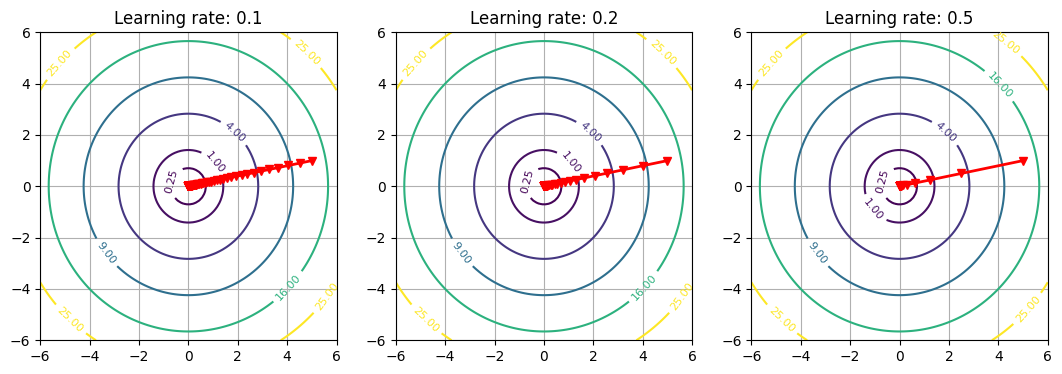

In [3]:
fig, ax = plt.subplots(1,3,figsize=(13,4))

f = quadratic_form(np.array([[1,0],[0,1]]))

xrange = [-6, 6]
yrange = [-6, 6]
levels = [0, 0.25, 1, 4, 9, 16, 25]
        
x = np.linspace(xrange[0], xrange[1], 100)
y = np.linspace(yrange[0], yrange[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = f.val(np.array([X[i, j], Y[i, j]]))

### Hyperparameters:
K = 100
lr_s = [0.1,0.2,0.5]
###

for ax_,lr in zip(ax,lr_s):
    
    CS = ax_.contour(X, Y, Z, levels=levels)
    ax_.clabel(CS, inline=1, fontsize=8) 
    ax_.grid()  
    
    x = np.array([5,1])
    history = [x]

    for k in range(K):
        x = x - lr*f.grad(x)
        history.append(x)

    history = np.array(history)
    ax_.plot(history[:,0],history[:,1],'-v', color='red', linewidth=2)
    ax_.set_title('Learning rate: '+str(lr))
    ax_.set_xlim(xrange)
    ax_.set_ylim(yrange)

This choice of objective corresponds to a quadratic function with *circular level sets* — an ideal case for gradient descent. 

#### Case 2: Not-so-well-conditioned matrix

Next, we choose a matrix with a high condition number:
$$A =\begin{bmatrix} 
	1 & 0 \\
	0 & 10 \\
	\end{bmatrix}$$
and, once again, observe GD behaviour with several learning rate values. 

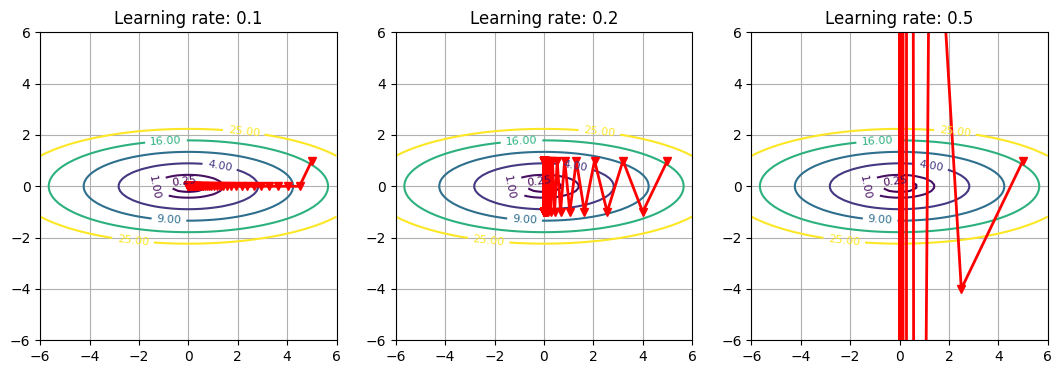

In [4]:
fig, ax = plt.subplots(1,3,figsize=(13,4))

f = quadratic_form(np.array([[1,0],[0,10]]))

xrange = [-6, 6]
yrange = [-6, 6]
levels = [0, 0.25, 1, 4, 9, 16, 25]
        
x = np.linspace(xrange[0], xrange[1], 100)
y = np.linspace(yrange[0], yrange[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = f.val(np.array([X[i, j], Y[i, j]]))

### Hyperparameters:
K = 100
lr_s = [0.1,0.2,0.5]
###

for ax_,lr in zip(ax,lr_s):
    
    CS = ax_.contour(X, Y, Z, levels=levels)
    ax_.clabel(CS, inline=1, fontsize=8) 
    ax_.grid()  
    
    x = np.array([5,1])
    history = [x]

    for k in range(K):
        x = x - lr*f.grad(x)
        history.append(x)

    history = np.array(history)
    ax_.plot(history[:,0],history[:,1],'-v', color='red', linewidth=2)
    ax_.set_title('Learning rate: '+str(lr))
    ax_.set_xlim(xrange)
    ax_.set_ylim(yrange)

We see that GD does not converge on a convex function in this example if the learning rate value is too large. 
Last graphs show the characteristic **"zigzagging" behavior** of GD around a narrow valley in the optimization landscape. This behavior illustrates how poor conditioning (which results in elongated level sets) is problematic for GD.



📌 In convex optimization literature, there are multiple strategies to choose a learning rate value in GD, which provie (stronger or weaker) theoretical guarantees for convergence. Well-known examples are [Wolfe conditions](https://en.wikipedia.org/wiki/Wolfe_conditions) and [Backtracking](https://en.wikipedia.org/wiki/Backtracking_line_search). However, these methods are computationally expensive and are not very common in modern ML. 

📌 In ML applications, it is more common to use so-called **adaptive optimization methods** that adjust the learning rate in each GD step based on the resent history of updates. Such methods are generalizations of GD and we will consider them later in the course.

## Linear binary classification with GD

We implement a new `GDClassifier` class, which is a version of a linear binary classifier that uses GD as its optimization (fitting) method. Similarly to the OLS classifier from the previous lecture, this class will inherit from `LinearBinaryClassification` and only add methods required for training.

Our gradient descent (GD) implementation needs to solve the following optimization problem:

$$
\min_{w,b} \dfrac{1}{2N} \| Xw + b \mathbb{1}_N - Y \|^2_2,
$$

Where:

- $ X \in \mathbb{R}^{N \times P} $: The feature matrix with $N$ samples and $P$ features.
- $ Y \in [-1,1]^N $: The target vector with $N$ labels.
- $ w \in \mathbb{R}^P $: The weight vector.
- $ b \in \mathbb{R} $: The bias term.
- $ \mathbb{1}_N $: A vector of ones of length $N$.

Here we assume that our loss function is the **squared loss** (or MSE), i.e.:
$$
\ell(x,y) := \dfrac{1}{2}(f(x)-y)^2, \quad \hat{\mathcal{L}}(X,Y) := \dfrac{1}{N}\sum_{i=1}^N \ell(x_i,y_i) = \dfrac{1}{2N}\|Xw + b \mathbb{1}_N - Y \|^2_2.
$$

> ### 💡 Gradients Calculation
> To implement a GD step, we need to compute the gradients of the objective function with respect to all the parameters. In this case, we manually compute the gradients for $w$ and $b$ as follows:
> 
> $$
> \nabla_w \hat{\mathcal{L}}(X,Y) = \dfrac{1}{N}X^T (Xw+b\mathbb{1}_N - Y)  = \dfrac{1}{N} \sum_{i=1}^N ( \langle x_i, w \rangle + b - y_i) * x_i
> $$
> 
> $$
> \nabla_b \hat{\mathcal{L}}(X,Y) = \dfrac{1}{N}\mathbb{1}_N^T (Xw+b\mathbb{1}_N - Y) = \dfrac{1}{N} \sum_{i=1}^N ( \langle x_i, w \rangle + b - y_i), 
> $$
> and implement these equations in the training method.


**📌 Automatic Differentiation:** In practice, many ML frameworks use **automatic differentiation** (auto-diff) to calculate these gradients. Auto-diff allows for efficient gradient computation without the need to manually derive the formulas, as we did above. This significantly simplifies the process, especially for more complex models (e.g., deep neural networks), where manually computing the gradients becomes impractical.

In [5]:
class LinearBinaryClassification:
    """
    Linear binary classification class.

    Stores a linear classification model with parameters (w,b)
    and decision function h(x) = sign(w @ x + b)

    Parameters:
    ----------
    w: array
    b: array

    """
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def decision_function(self, x):
        return x @ self.w + self.b
    
    def __call__(self, x):
        # Numpy's `where` function provides a fast substitution
        return np.where(self.decision_function(x) >= 0.0, 1, -1)
    
class GDClassifier(LinearBinaryClassification):
    """
    Gradient descent binary classifier
    """

    def loss(self, X, Y):
        """Loss function"""
        residual = self.decision_function(X) - Y
        return 0.5*np.mean(residual**2, axis=0)
    
    def loss_grad(self, X,Y):
        """Loss gradient"""
        residual = self.decision_function(X) - Y
        w_grad = X.T@residual/X.shape[0]
        b_grad = np.mean(residual, axis=0)
        return w_grad, b_grad
    
    
    def update(self, X, Y, lr = 1e-3):
        """Single step of GD"""
        grad_w, grad_b = self.loss_grad(X,Y)
        self.w -= lr*grad_w
        self.b -= lr*grad_b
               
    def fit(self, X, Y, lr = 1e-3, num_iter = 100):
        """GD training loop with num_iter epochs"""
        for _ in range(num_iter):
            self.update(X, Y, lr)
            
        return self.w, self.b

## 🌸 Test GD classifier on Iris data
As before, we first test our method on the easy Iris dataset, following the same steps as in the previos lectures.

### Load the data

In [6]:
file_name = 'iris_data_set.csv'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal length [cm]', 'sepal width [cm]',
                'petal length [cm]', 'petal width [cm]', 'iris type']

if os.path.exists(file_name):
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name, index_col=0)
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url, names=column_names)
    df.to_csv(file_name)
    print('Done.')

Loading data from local file `iris_data_set.csv`...


### Assign class labels

In [7]:
df['class'] = df['iris type'].replace(
    ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    [-1, 1, 1])

/var/folders/9v/zb2h9_ys5yz0c88dl39lnxbh0000gn/T/ipykernel_62420/859164777.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['iris type'].replace(


### Train-test split 

In [8]:
def  train_test_split(df, training_data_fraction, shuffle=True):
    """
    Split all available data into a training and test data set.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame of available data.

    training_data_fraction : float
        The fraction of the data that should be used for training.
        E.g., `training_data_fraction=0.6` means 60%.

    shuffle : bool , optional
        If True, randomly reshuffles the data before the split.

    Returns:
    -------
    _df : DataFrame
        Shuffled DataFrame

    train_df: DataFrame
        Train split
        
    test_df: DataFrame
        Test split
    """
    
    if shuffle is True:
        _df = df.sample(frac=1).reset_index(drop=True)
    else:
        _df= df
    
    train_df = _df.iloc[:round(training_data_fraction*len(_df)),:]
    test_df = _df.iloc[round(training_data_fraction*len(_df)):,:]
    
    return _df, train_df, test_df

In [9]:
training_data_fraction = .8

df, train_df, test_df =  train_test_split(df, training_data_fraction)

print('Training data split as follows:')
print(f'  Training data samples: {len(train_df)}')
print(f'      Test data samples: {len(test_df)}')

Training data split as follows:
  Training data samples: 120
      Test data samples: 30


### Convert to Numpy

In [10]:
# convert DataFrame entries to Numpy arrays
# `X, Y`: all data
# `train_X, train_Y`: training data
# `test_X, test_Y`: training data

X = df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
Y = df['class'].to_numpy()

train_X = train_df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
train_Y = train_df['class'].to_numpy().ravel()

test_X = test_df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
test_Y = test_df['class'].to_numpy().ravel()


### Train a model and plot the results

In [11]:
w = np.array([0., 0.])
b = 0.

model = GDClassifier(w, b)
model.fit(train_X,train_Y, lr=1e-3, num_iter=5000)

(array([-0.11474055,  1.05822506]), np.float64(-0.22806912702590476))

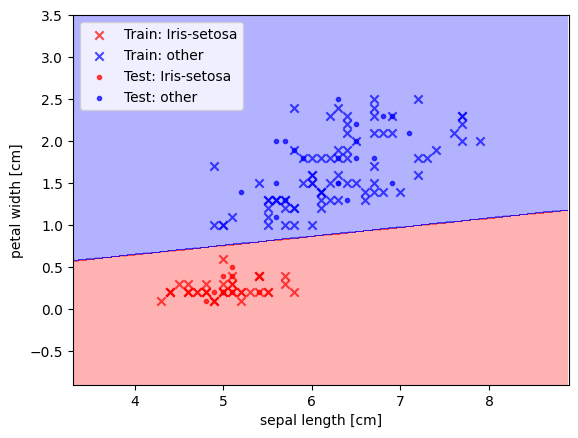

In [12]:
fig, ax = plt.subplots()

x1_min = train_X[:, 0].min() - 1
x1_max = train_X[:, 0].max() + 1
x2_min = train_X[:, 1].min() - 1
x2_max = train_X[:, 1].max() + 1

x1_list, x2_list = np.meshgrid(np.arange(x1_min, x1_max, .01), 
                               np.arange(x2_min, x2_max, .01))

X_list = np.dstack([x1_list, x2_list])
h_list = model(X_list)

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
plt.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)


plt.scatter(train_X[train_Y==-1][:, 0], train_X[train_Y==-1][:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X[train_Y==1][:, 0], train_X[train_Y==1][:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

plt.scatter(test_X[test_Y==-1][:, 0], test_X[test_Y==-1][:, 1], marker='.', color='red', label='Test: Iris-setosa', alpha=.7)
plt.scatter(test_X[test_Y==1][:, 0], test_X[test_Y==1][:, 1], marker='.', color='blue', label='Test: other', alpha=.7)

plt.xlabel('sepal length [cm]')
plt.xlim(x1_min, x1_max)
plt.ylabel('petal width [cm]')
plt.ylim(x2_min, x2_max)
plt.legend()

## 📉 Learning curves

**Learning curves** are plots that show how a machine learning model’s performance changes over time as it learns — typically visualized against the number of training iterations (or epochs). They usually show:
- Train/test loss
- Other metrics not directly optimized during training (e.g., accuracy)

Learning curves are useful to understand the model's convergence (if it's already converged or still improving), compare models, tune hyperparameters, etc.

Here we will plot learning curves for our GD classifier trained on the Iris data. The metrics that we will monitor will be loss and accuracy, both on train and test sets. 

In [13]:
def accuracy(y_pred,y_true):
    return (np.sum(y_pred == y_true)/y_true.size)*100

📌 We choose to implement accuracy outside of the classifier class. The rationale is that metrics used to evaluate the performance but not to train a model are not internal parts of the class and can/should be implemented by the class user rather than the designer. However, some frameworks (including `scikit-learn`) implement certain basic metrics inside the class. 

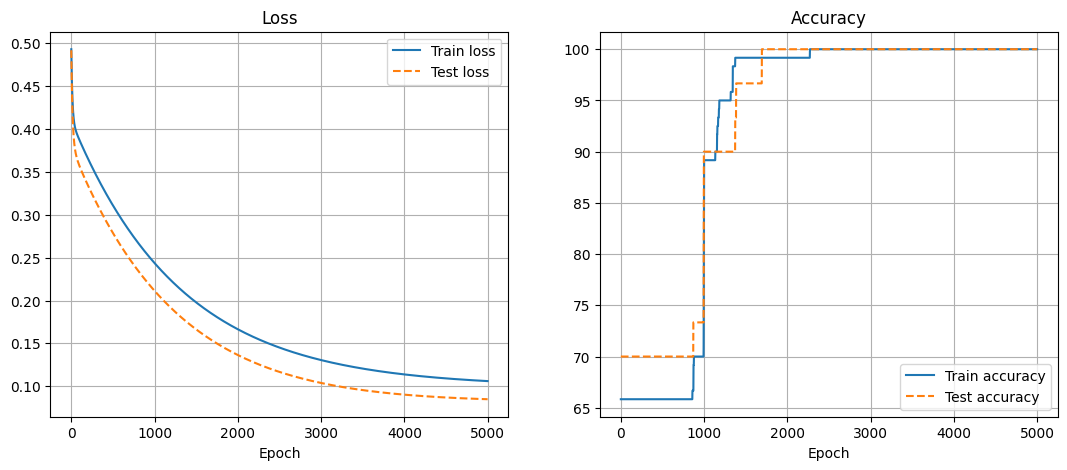

In [14]:
fig, ax = plt.subplots(1,2,figsize=(13,5))

w = np.array([0., 0.])
b = 0.
model = GDClassifier(w, b)

history = {'train_accuracy': [],
           'train_loss':     [],
           'test_accuracy':  [],
           'test_loss':      []}

num_iter = 5000

for i in range(num_iter):
    model.update(train_X,train_Y, lr=1e-3)

    history['train_accuracy'].append(accuracy(model(train_X),train_Y))
    history['test_accuracy'].append(accuracy(model(test_X),test_Y))

    history['train_loss'].append(model.loss(train_X,train_Y))
    history['test_loss'].append(model.loss(test_X,test_Y))

ax[0].plot(history['train_loss'], label='Train loss')
ax[0].plot(history['test_loss'], label='Test loss', linestyle='--')
ax[0].set_title('Loss')

ax[0].set_xlabel('Epoch')
ax[0].grid()
ax[0].legend()

ax[1].plot(history['train_accuracy'], label='Train accuracy')
ax[1].plot(history['test_accuracy'], label='Test accuracy', linestyle='--')
ax[1].set_title('Accuracy')

ax[1].set_xlabel('Epoch')
ax[1].grid()
ax[1].legend()

## Exercise: Stochastic Gradient Descent (SGD)

When working with large datasets, computing the gradient of the loss over the entire dataset at each optimization step (as in full-batch Gradient Descent) can be computationally expensive.

Instead, we can use Stochastic Gradient Descent (SGD), where each update is performed using only one data point at a time. This results in faster but noisier updates.

>### ⚙️ Stochastic Gradient Descent Algorithm
>
> 0. **Choose hyperparameters**:
>    - Learning rate $\eta \in \mathbb{R}_+$,
>    - Number of epochs $ K \in \mathbb{N} $.
> 
> 1. **Initialize** parameters $ w^{(0)} $, set $ k = 0 $.
> 
> 2. **For** each epoch $ k < K $: 
>    - Shuffle the dataset
>    - **For** each sample $(x_i,y_i)$ in the shuffled dataset:
>       - Compute the SGD update:  $ w^{next} = w - \eta \nabla_w \ell (w, x_i, y_i) $
> 
> 3. **Return** the final parameters $ w$.


**Task:** Implement SGD classifier as another class inherited from `LinearBinaryClassifier`. Train a model with SGD and plot the learning curve. How does it compare to the full-batch GD curve?